In [6]:
import pandas as pd
import numpy as np

In [7]:
GMM_first=[
    "/home/spoudel/Thesis/Data/Lathrope/train_test/data_pass/l1_3781904_1212859/model_2/GMM_first_pass_3781904_1212859_38.csv",
    "/home/spoudel/Thesis/Data/Lathrope/train_test/data_pass/l3_3781881_1212807/model_2/GMM_first_pass_3781881_1212807_105.csv"
     ]

power_first=[
    "/home/spoudel/Thesis/Data/Lathrope/train_test/data_pass/l1_3781904_1212859/power_first_pass_3781904_1212859_38.csv",
    "/home/spoudel/Thesis/Data/Lathrope/train_test/data_pass/l3_3781881_1212807/power_first_pass_3781881_1212807_105.csv"
     ]

KMeans_first=[
    "/home/spoudel/Thesis/Data/Lathrope/train_test/data_pass/l1_3781904_1212859/model_2/KMeans_first_pass_3781904_1212859_38.csv",
    "/home/spoudel/Thesis/Data/Lathrope/train_test/data_pass/l3_3781881_1212807/model_2/KMeans_first_pass_3781881_1212807_105.csv"
]



In [8]:
df_GMMS=[pd.read_csv(x) for x in GMM_first]
df_KMeans=[pd.read_csv(x) for x in KMeans_first]
df_final_power=[pd.read_csv(x) for x in power_first]

In [9]:
def pass_change(df):
    try:
        df["prev"]=df["GMM"].shift(1)
        df["change"]=df.apply(lambda x: x["prev"]-x["GMM"],axis=1)
        df["pss_change"]=df.apply(lambda x: abs(x["change"]),axis=1)
    except:
        df["prev"]=df["K_Means"].shift(1)
        df["change"]=df.apply(lambda x: x["prev"]-x["K_Means"],axis=1)
        df["pss_change"]=df.apply(lambda x: abs(x["change"]),axis=1)
    return df

df_GMMS_c=[pass_change(df) for df in df_GMMS]
df_KMeans_c=[pass_change(df) for df in df_KMeans]


In [19]:
value_counts_GMM=[x["pss_change"].value_counts() for x in df_GMMS_c]
value_counts_GMM

[0.0    37
 1.0    23
 2.0    20
 3.0     3
 Name: pss_change, dtype: int64,
 0.0    47
 1.0    33
 2.0    10
 3.0     1
 Name: pss_change, dtype: int64]

In [25]:
value_counts_GMM=[x["GMM"].value_counts() for x in df_GMMS_c]
value_counts_GMM

[1    42
 3    22
 2    17
 4     3
 Name: GMM, dtype: int64,
 2    44
 1    34
 3    12
 4     2
 Name: GMM, dtype: int64]

In [24]:
value_counts_KMeans=[x["K_Means"].value_counts() for x in df_KMeans_c]
value_counts_KMeans

[1    42
 3    22
 2    17
 4     3
 Name: K_Means, dtype: int64,
 2    44
 1    34
 3    12
 4     2
 Name: K_Means, dtype: int64]

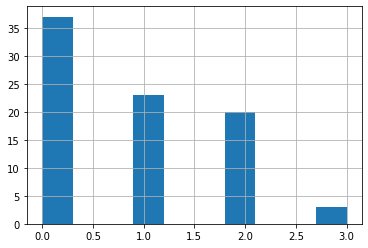

In [20]:
df_GMMS_c[0]["pss_change"].hist()

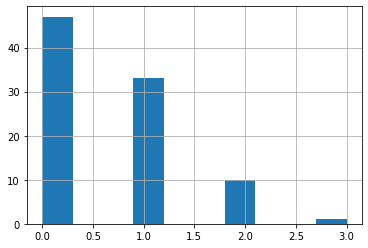

In [21]:
df_GMMS_c[1]["pss_change"].hist()

In [22]:
# df_GMMS_c[2]["pss_change"].hist()

In [23]:
value_counts_KMeans=[x["pss_change"].value_counts() for x in df_KMeans_c]
value_counts_KMeans

[0.0    37
 1.0    23
 2.0    20
 3.0     3
 Name: pss_change, dtype: int64,
 0.0    47
 1.0    33
 2.0    10
 3.0     1
 Name: pss_change, dtype: int64]

count    84.000000
mean      1.833333
std       0.942099
min       1.000000
25%       1.000000
50%       1.500000
75%       3.000000
max       4.000000
Name: K_Means, dtype: float64

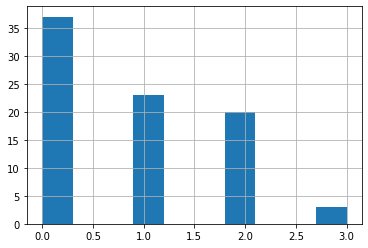

In [16]:
df_KMeans_c[0]["pss_change"].hist()
df_KMeans_c[0]["K_Means"].describe()

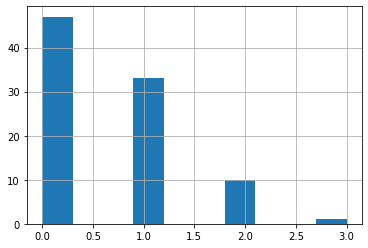

In [17]:
df_KMeans_c[1]["pss_change"].hist()

In [18]:
# df_KMeans_c[2]["pss_change"].hist()

[None, None, None]

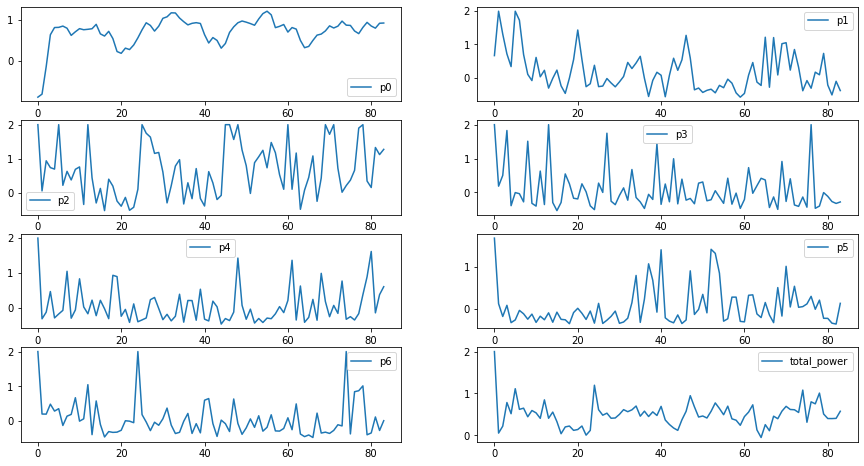

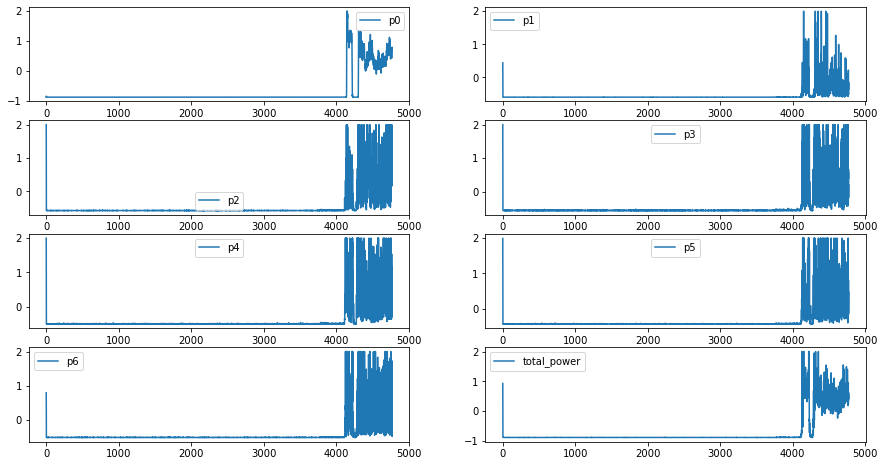

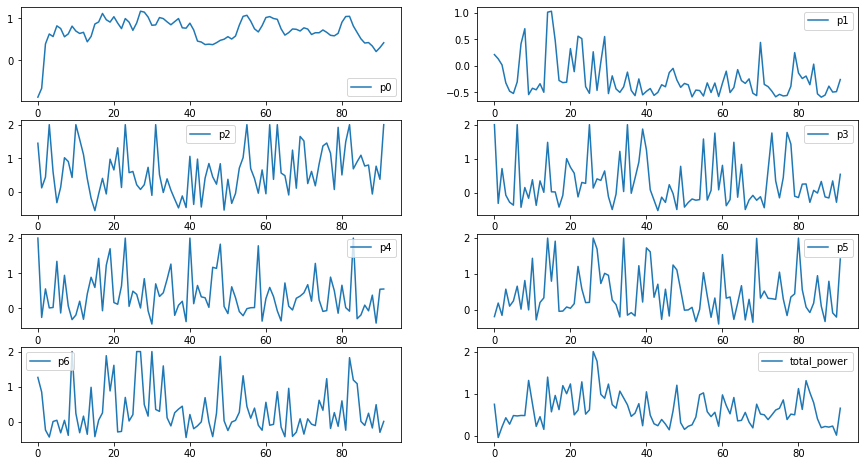

In [24]:
import matplotlib.pyplot as plt

def plot_power_simple(df):
    fig, axes = plt.subplots(nrows=4, ncols=2)
    fig.set_figheight(8)
    fig.set_figwidth(15)

    df[["timestamp","p0"]].plot(ax=axes[0,0])
    df[["timestamp","p1"]].plot(ax=axes[0,1])
    df[["timestamp","p2"]].plot(ax=axes[1,0])
    df[["timestamp","p3"]].plot(ax=axes[1,1])
    df[["timestamp","p4"]].plot(ax=axes[2,0])
    df[["timestamp","p5"]].plot(ax=axes[2,1])
    df[["timestamp","p6"]].plot(ax=axes[3,0])
    df[["timestamp","total_power"]].plot(ax=axes[3,1])
    
[plot_power_simple(df) for df in df_final_power]